# Sklearn Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score
from mlsurfzone.lotus_dataset import LotusDataset
from mlsurfzone.validate import plot_cm
import matplotlib.pyplot as plt

import dtreeviz
# from dtreeviz.shadow import *
from dtreeviz.trees import *

import graphviz

import pickle

In [2]:
bin_labels = ['FLAT', 'VERY POOR', 'POOR', 'POOR_TO_FAIR', 'FAIR', 'FAIR_TO_GOOD+']

In [4]:
dataset = LotusDataset(train=True, config_name='config_dtclf_5pt.yaml')
X, Y = dataset[:]
test = LotusDataset(train=False, config_name='config_dtclf_5pt.yaml')
x, y = test[:]

In [5]:
print('Feature cols: ', dataset.full_feature_cols)
print('Label cols: ', dataset.full_label_cols)

Feature cols:  ['LotusSigH' 'LotusSigH_part1' 'LotusTp_part1' 'LotusSpred_part1'
 'LotusPdir_norm_part1' 'LotusSigH_part2' 'LotusTp_part2'
 'LotusSpred_part2' 'LotusPdir_norm_part2' 'GFS_wind_speed'
 'GFS_wind_dir_norm' 'GFS_onshore_comp' 'GFS_crossshore_comp'
 'human_report_surf_max_ft']
Label cols:  ['human_report_surf_condition_5pt']


In [15]:
# clf = DecisionTreeClassifier(criterion='entropy')
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
# clf = DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X, Y)

In [16]:
pred = clf.predict(x)

In [17]:
y = y.astype(int)
pred = pred.astype(int)

In [18]:
f1_score(y, pred, average='macro')

0.5704579947012833

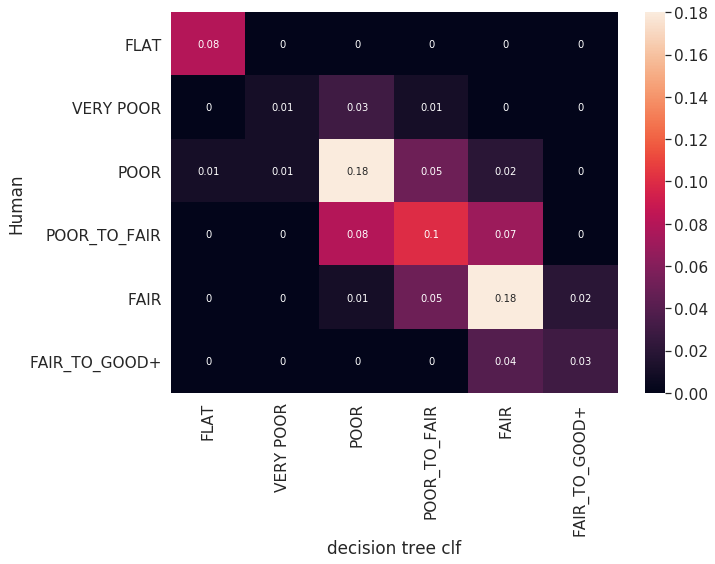

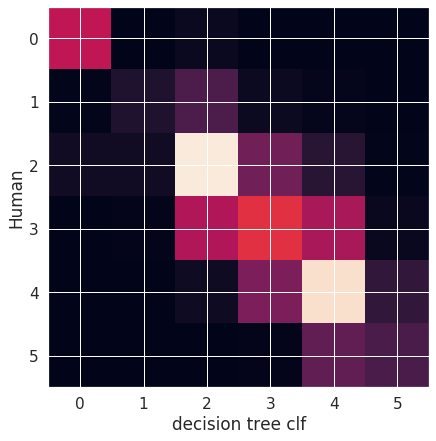

In [19]:
plot_cm(pred, y, name='decision tree clf', bin_labels=bin_labels, normalize_over='all')

In [42]:
# fname = 'dtclf.pkl'
# pickle.dump(clf, open(fname, 'wb'))

In [43]:
# with open('dtree.dot', 'w') as dotfile: 
#     tree.export_graphviz(clf, out_file=dotfile, feature_names=dataset.full_feature_cols)

In [44]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=500)
# tree.plot_tree(clf, feature_names=test.full_feature_cols, class_names=bin_labels, 
#                filled=True)
# fig.savefig('big_tree.png')

In [20]:
df = pd.DataFrame(X, columns=dataset.full_feature_cols)
df = df.astype(float)
# df['SpotID'] = df['SpotID'].astype(int)
X = df.values

In [21]:
np.min(X)

-180.0

In [22]:
viz = dtreeviz(clf,
                X,
                (Y-1).astype(int).flatten(),
                target_name='condition',
                feature_names=dataset.full_feature_cols,
                orientation="TD",
                class_names=bin_labels,
                fancy=False,
                label_fontsize=12,
                ticks_fontsize=8, 
                fontname='Arial')

In [23]:
viz.save('dtree10_nospotid.svg')

Now, the surf height+wind only classifier.

In [3]:
shw_dataset = LotusDataset(train=True, config_name='config_dtclf_shw.yaml')
XX, YY = shw_dataset[:]
shw_test = LotusDataset(train=False, config_name='config_dtclf_shw.yaml')
xx, yy = shw_test[:]

In [12]:
shw = DecisionTreeClassifier(criterion='entropy')
# shw = DecisionTreeClassifier(criterion='entropy', max_depth=10)
shw = shw.fit(XX, YY)
shw_pred = shw.predict(xx)

In [13]:
yy = yy.astype(int)
shw_pred = shw_pred.astype(int)

In [14]:
f1_score(yy, shw_pred, average='macro')

0.6480876282094102

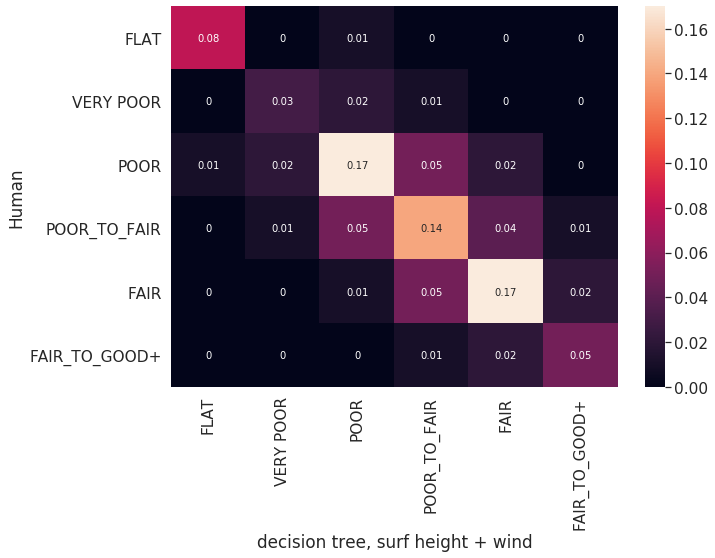

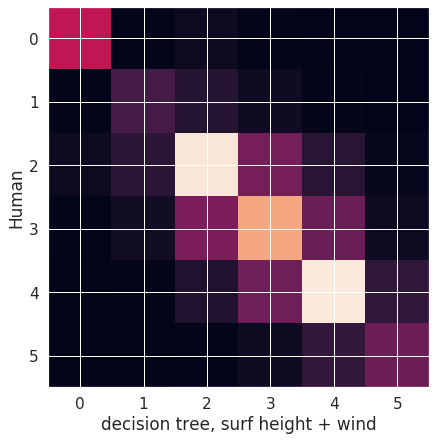

In [15]:
plot_cm(shw_pred, yy, name='decision tree, surf height + wind', bin_labels=bin_labels, normalize_over='all')

In [16]:
fname = 'dtclf_shw.pkl'
pickle.dump(shw, open(fname, 'wb'))

In [10]:
viz = dtreeviz(shw,
                XX,
                (YY-1).astype(int).flatten(),
                target_name='condition',
                feature_names=shw_dataset.full_feature_cols,
                orientation="TD",
                class_names=bin_labels,
                fancy=False,
                label_fontsize=12,
                ticks_fontsize=8, 
                fontname='Arial')

In [11]:
viz.save('dtree10_shw.svg')